In [1]:
import awkward as ak
import uproot
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
plt.style.use(hep.style.ROOT)

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

#line thickness
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 5

In [2]:
sample = "root://cmsxrootd-site.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/ZZTo2Nu2Q_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/60000/1ECB96AA-C06C-824F-B59D-3D17ADAB89C7.root"

In [3]:
events = NanoEventsFactory.from_root(sample, schemaclass=NanoAODSchema).events()

In [4]:
events.PSWeight

<Array [[1.11, 0.831, 0.867, ... 1.09, 1.55]] type='106488 * [var * float32[para...'>

In [5]:
events.LHEScaleWeight

<Array [[0.995, 1.01, 1.02, ... 0.816, 0.776]] type='106488 * [var * float32[par...'>

In [6]:
events.LHEPdfWeight

<Array [[1, 1, 0.997, ... 1, 0.947, 1.05]] type='106488 * [var * float32[paramet...'>

In [5]:
def check_not_none(a):
    print(len(a[~ak.is_none(a)]))
    
def return_not_none(a):
    return a[~ak.is_none(a)]

In [6]:
fatjets = events.FatJet

candidatejet = fatjets[(fatjets.pt > 200)
                       & (abs(fatjets.eta) < 2.5)
                       & fatjets.isTight
                      ]

leadingjets = candidatejet[:, 0:2]
            

In [7]:
particleNetMD_Xbb = leadingjets.particleNetMD_Xbb
particleNetMD_Xcc = leadingjets.particleNetMD_Xcc
particleNetMD_Xqq = leadingjets.particleNetMD_Xqq
particleNetMD_QCD = leadingjets.particleNetMD_QCD

# ascending = true                                                                                                                                
indices = ak.argsort(particleNetMD_Xbb,axis=1)

# candidate jet is more b-like (lower CvB score)                                                                                                           
candidatejet = return_not_none(ak.firsts(leadingjets[indices[:, 1:2]]))
            
# second jet is more charm-like (larger CvB score)                                                                                                           
secondjet = return_not_none(ak.firsts(leadingjets[indices[:, 0:1]]))

In [8]:
ddcvb = leadingjets.btagDDCvBV2

# ascending = true                                                                                                                                
indices = ak.argsort(ddcvb,axis=1)

# candidate jet is more b-like (lower CvB score)                                                                                                           
candidatejet_old = ak.firsts(leadingjets[indices[:, 1:2]])
            
# second jet is more charm-like (larger CvB score)                                                                                                           
secondjet_old = ak.firsts(leadingjets[indices[:, 0:1]])

In [9]:
bins=np.linspace(0,1,11)

Text(1, 0, 'particleNetMD')

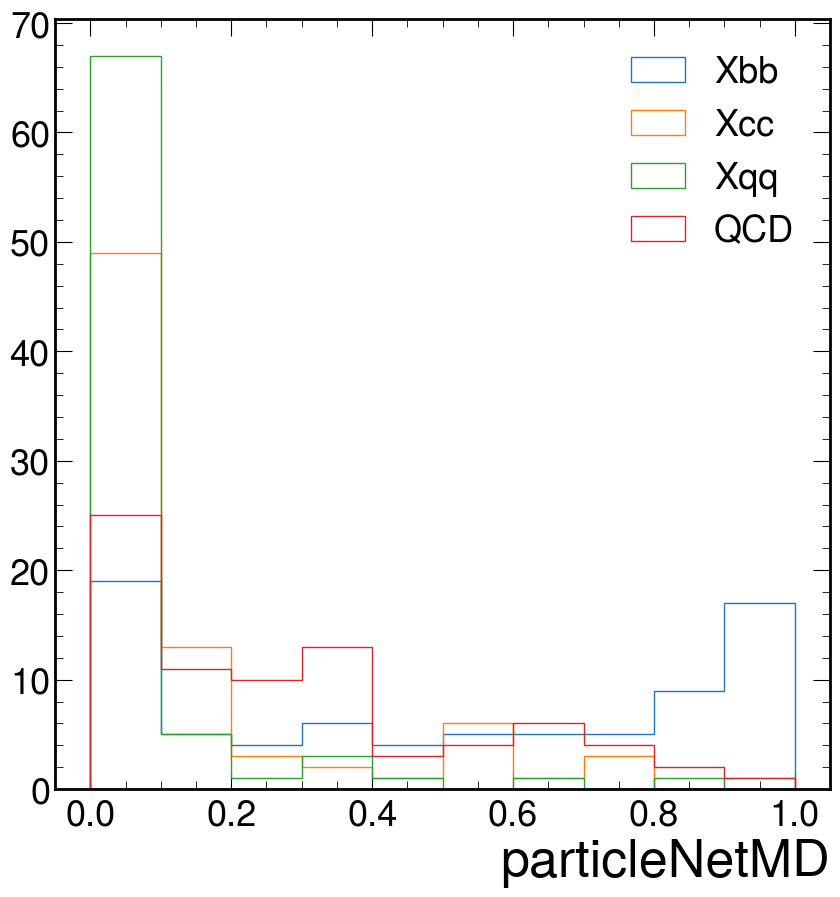

In [10]:
particleNetMD_Xbb = candidatejet.particleNetMD_Xbb
particleNetMD_Xcc = candidatejet.particleNetMD_Xcc
particleNetMD_Xqq = candidatejet.particleNetMD_Xqq
particleNetMD_QCD = candidatejet.particleNetMD_QCD

plt.hist(particleNetMD_Xbb,histtype='step',bins=bins,label='Xbb');
plt.hist(particleNetMD_Xcc,histtype='step',bins=bins,label='Xcc');
plt.hist(particleNetMD_Xqq,histtype='step',bins=bins,label='Xqq');
plt.hist(particleNetMD_QCD,histtype='step',bins=bins,label='QCD');
plt.legend(frameon=False)
plt.xlabel('particleNetMD')

Text(1, 0, 'Transformed particleNetMD')

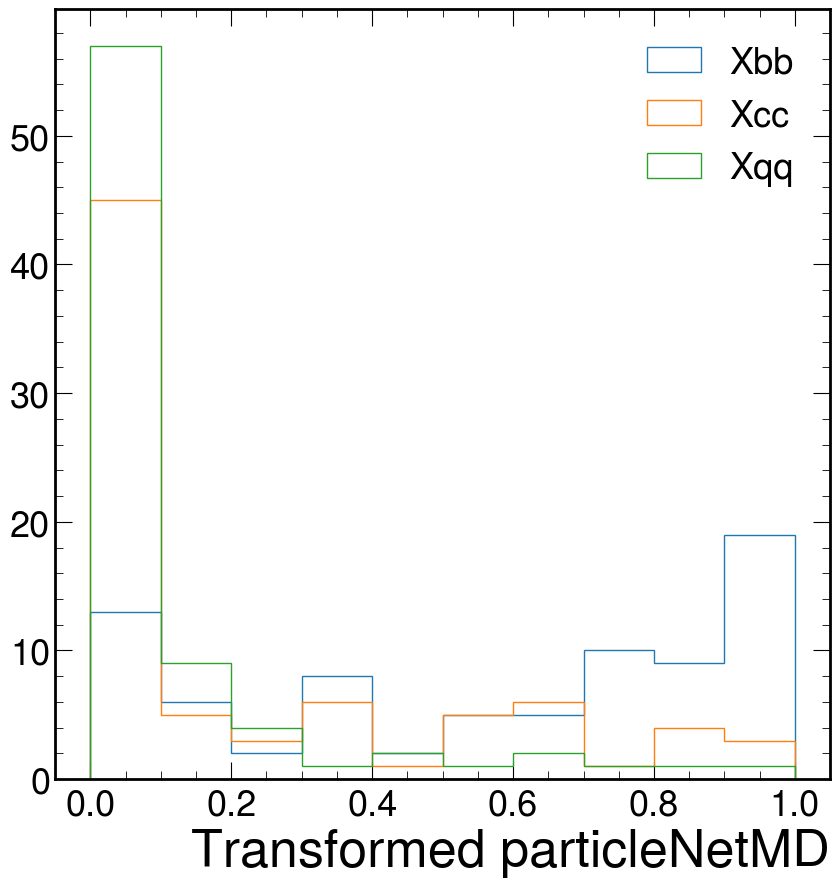

In [11]:
plt.hist(particleNetMD_Xbb / (1 - particleNetMD_Xcc - particleNetMD_Xqq),histtype='step',bins=bins,label='Xbb');
plt.hist(particleNetMD_Xcc / (1 - particleNetMD_Xbb - particleNetMD_Xqq),histtype='step',bins=bins,label='Xcc');
plt.hist(particleNetMD_Xqq / (1 - particleNetMD_Xbb - particleNetMD_Xcc),histtype='step',bins=bins,label='Xqq');
#plt.hist(particleNetMD_QCD / (particleNetMD_Xbb + particleNetMD_QCD + particleNetMD_Xcc + particleNetMD_Xqq),histtype='step',bins=bins,label='QCD');
plt.legend(frameon=False)
plt.xlabel('Transformed particleNetMD')

Text(1, 0, 'particleNet')

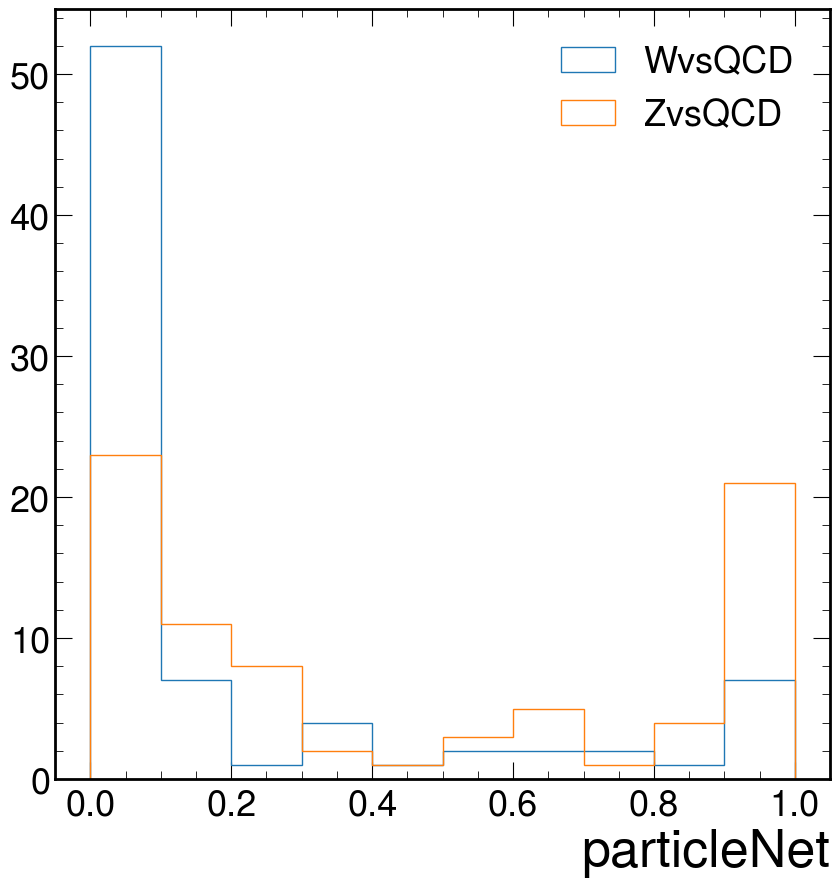

In [12]:
plt.hist(candidatejet.particleNet_WvsQCD,histtype='step',bins=bins,label='WvsQCD');
plt.hist(candidatejet.particleNet_ZvsQCD,histtype='step',bins=bins,label='ZvsQCD');
plt.legend(frameon=False)
plt.xlabel('particleNet')

Text(1, 0, 'particleNetMD')

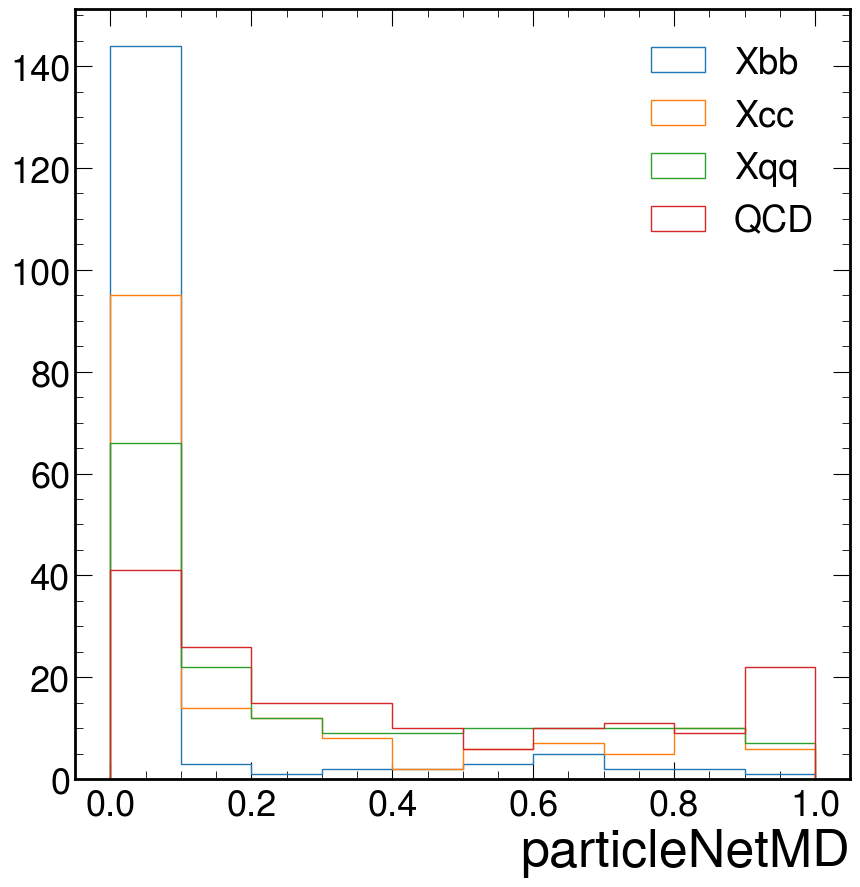

In [13]:
particleNetMD_Xbb = secondjet.particleNetMD_Xbb
particleNetMD_Xcc = secondjet.particleNetMD_Xcc
particleNetMD_Xqq = secondjet.particleNetMD_Xqq
particleNetMD_QCD = secondjet.particleNetMD_QCD

plt.hist(particleNetMD_Xbb,histtype='step',bins=bins,label='Xbb');
plt.hist(particleNetMD_Xcc,histtype='step',bins=bins,label='Xcc');
plt.hist(particleNetMD_Xqq,histtype='step',bins=bins,label='Xqq');
plt.hist(particleNetMD_QCD,histtype='step',bins=bins,label='QCD');
plt.legend(frameon=False)
plt.xlabel('particleNetMD')

165
165
165


Text(1, 0, 'Transformed particleNetMD')

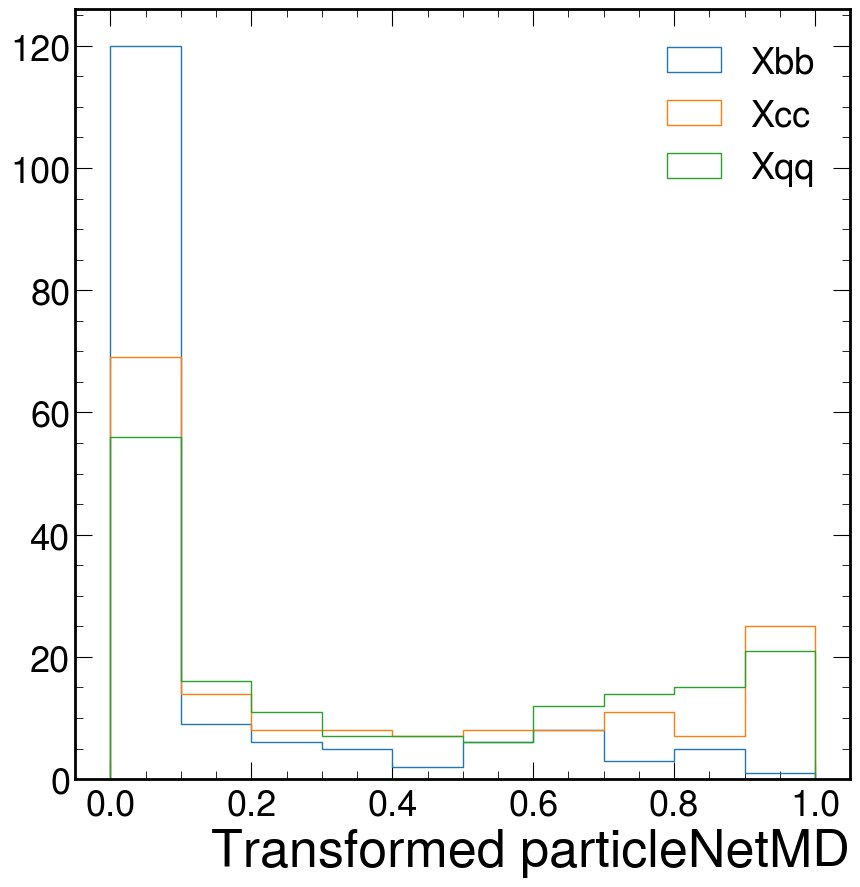

In [14]:
check_not_none(particleNetMD_Xbb / (1 - particleNetMD_Xcc - particleNetMD_Xqq))
check_not_none(particleNetMD_Xcc / (1 - particleNetMD_Xbb - particleNetMD_Xqq))
check_not_none(particleNetMD_Xqq / (1 - particleNetMD_Xbb - particleNetMD_Xcc))

plt.hist(particleNetMD_Xbb / (1 - particleNetMD_Xcc - particleNetMD_Xqq),histtype='step',bins=bins,label='Xbb');
plt.hist(particleNetMD_Xcc / (1 - particleNetMD_Xbb - particleNetMD_Xqq),histtype='step',bins=bins,label='Xcc');
plt.hist(particleNetMD_Xqq / (1 - particleNetMD_Xbb - particleNetMD_Xcc),histtype='step',bins=bins,label='Xqq');
#plt.hist(particleNetMD_QCD / (particleNetMD_Xbb + particleNetMD_QCD + particleNetMD_Xcc + particleNetMD_Xqq),histtype='step',bins=bins,label='QCD');
plt.legend(frameon=False)
plt.xlabel('Transformed particleNetMD')

Text(1, 0, 'particleNet')

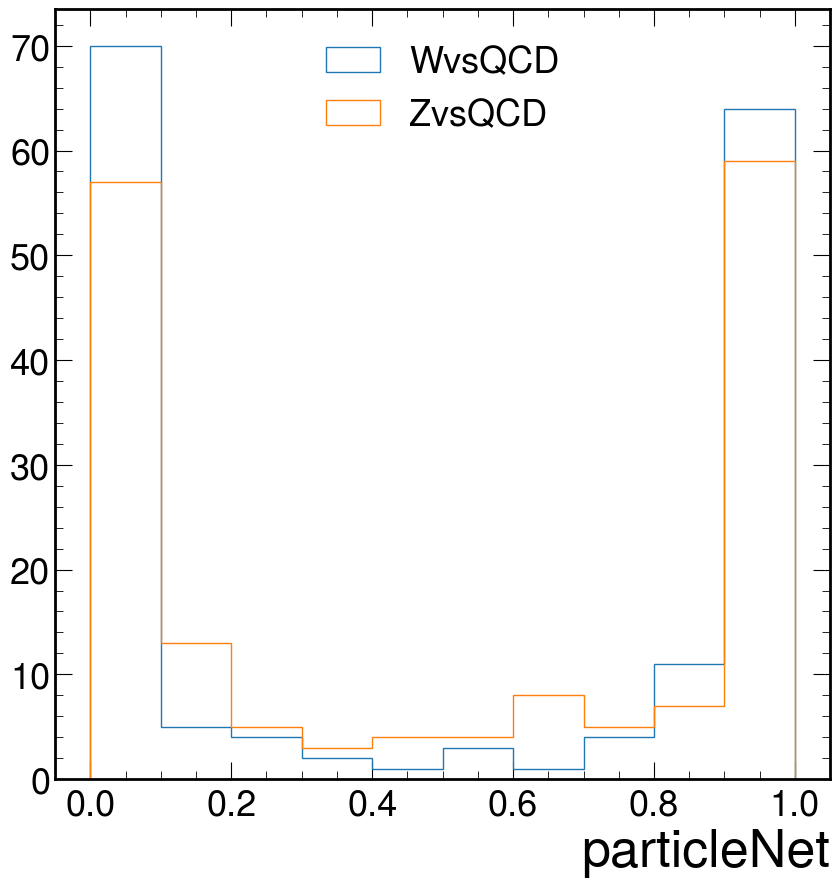

In [15]:
plt.hist(secondjet.particleNet_WvsQCD,histtype='step',bins=bins,label='WvsQCD');
plt.hist(secondjet.particleNet_ZvsQCD,histtype='step',bins=bins,label='ZvsQCD');
plt.legend(frameon=False)
plt.xlabel('particleNet')

(array([ 2.,  4., 11., 39., 17.,  3.,  2.,  0.,  0.,  1.]),
 array([-236.75      , -174.2250061 , -111.69999695,  -49.17499924,
          13.35000038,   75.875     ,  138.3999939 ,  200.92500305,
         263.45001221,  325.9750061 ,  388.5       ]),
 <BarContainer object of 10 artists>)

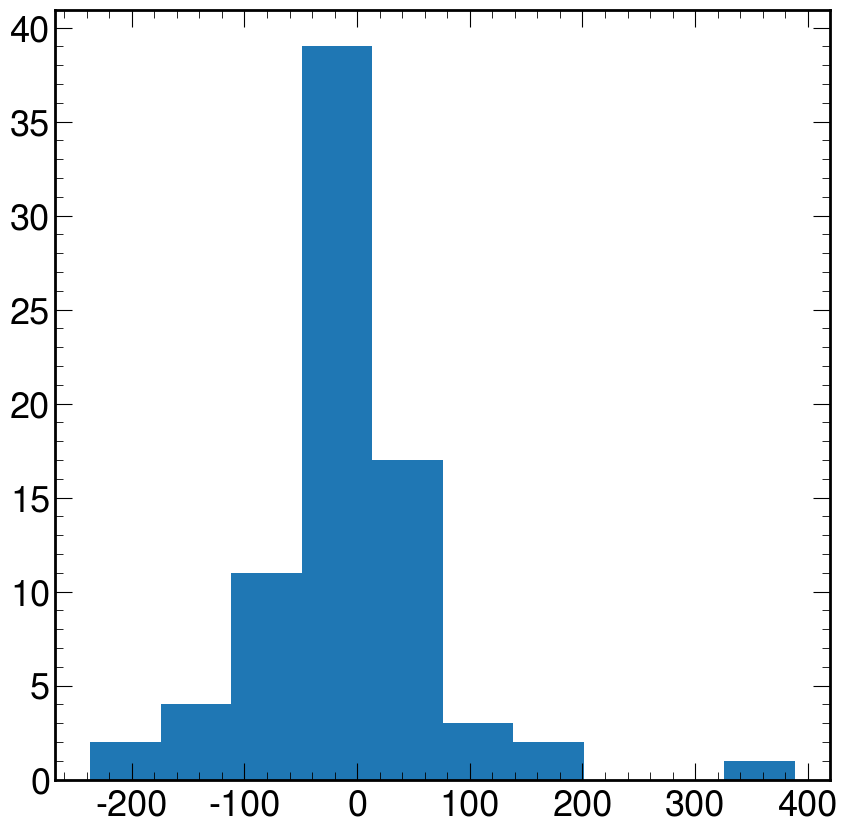

In [16]:
candidatejet_diff = return_not_none(candidatejet.pt) - return_not_none(candidatejet_old.pt)
plt.hist(candidatejet_diff)

(array([  1.,   0.,   0.,   2.,   3.,  17., 125.,  11.,   4.,   2.]),
 array([-388.5       , -325.9750061 , -263.45001221, -200.92500305,
        -138.3999939 ,  -75.875     ,  -13.35000038,   49.17499924,
         111.69999695,  174.2250061 ,  236.75      ]),
 <BarContainer object of 10 artists>)

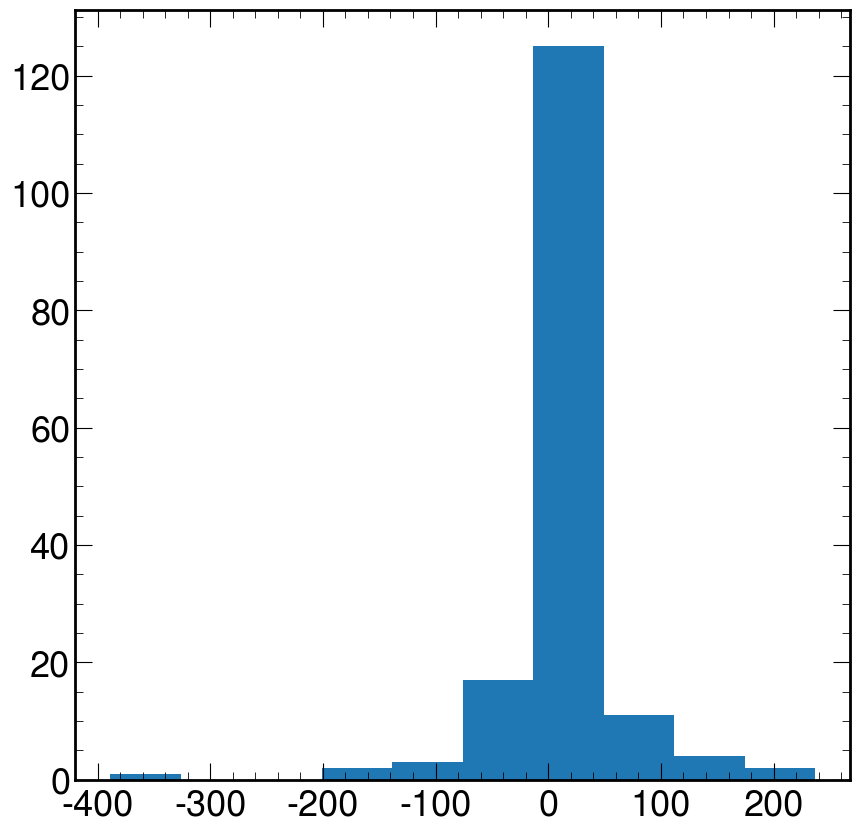

In [17]:
secondjet_diff = return_not_none(secondjet.pt) - return_not_none(secondjet_old.pt)
plt.hist(secondjet_diff)